### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
test_y_df = pd.read_csv('../datasets/titanic_gender_submission.csv')
test_df = pd.read_csv('../datasets/titanic_test.csv')
train_df = pd.read_csv('../datasets/titanic_train.csv')

In [3]:
train = train_df[['Pclass', 'Sex', 'Age', 'Survived']]
test = test_df[['Pclass', 'Sex', 'Age']]
test_y = test_y_df['Survived']

In [4]:
train = train.dropna(axis=0)

encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])

In [5]:
scaler = MinMaxScaler()

scaler.fit(train[['Age']])

data = scaler.transform(train[['Age']])

train['Age'] = data

In [6]:
X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()

lr.fit(X, y)


LogisticRegression()

In [7]:
# test 데이터 전처리

# test = test.dropna(axis=0)
test = test.fillna(np.mean(test['Age']))

encoder = LabelEncoder()
test['Sex'] = encoder.fit_transform(test['Sex'])

scaler = MinMaxScaler()
scaler.fit(test[['Age']])
test['Age'] = scaler.transform(test[['Age']])


In [8]:
pred = lr.predict(test)

In [23]:
lr_pred_proba = lr.predict_proba(test)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [24]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(test_y, lr_pred_proba[:, 1])

In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

dt_pred_proba = dt.predict_proba(test)
dt_fpr, dt_tpr, dt_threshold = roc_curve(test_y, dt_pred_proba[:, 1])

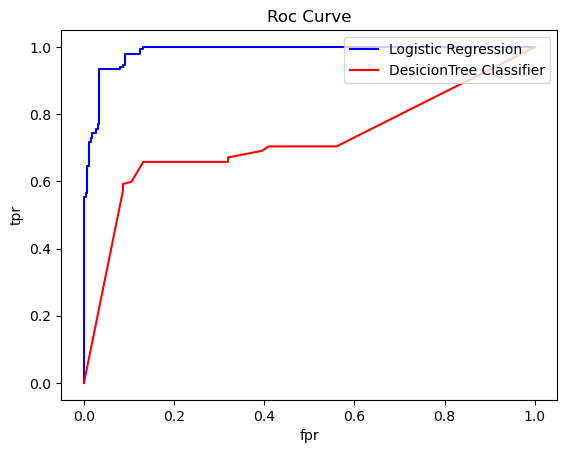

In [25]:
plt.title("Roc Curve")

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot(lr_fpr, lr_tpr, "b", label = 'Logistic Regression')
plt.plot(dt_fpr, dt_tpr, "r", label = 'DesicionTree Classifier')
plt.legend(loc = "upper right")

plt.show()

### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [20]:
from sklearn.metrics import roc_auc_score

In [26]:
lr_auc = roc_auc_score(test_y, lr_pred_proba[:, 1])
dt_auc = roc_auc_score(test_y, dt_pred_proba[:, 1])

In [27]:
print(f'lr_auc는 {lr_auc}, dt_auc는 {dt_auc}')

lr_auc는 0.9852344677483182, dt_auc는 0.7184161060546101
